# C3R2 SOM Recreate
Recreates the C3R2 SOM. 

Tables used: 
* cosmos_c3r2_phot_som_assignment.fits
* vvds_c3r2_phot_som_assignment.fits

(note these are matched tables of [field]_c3r2_phot_2021nov17.fits x [field]\_som_assignment.fits x lensing_\[field]\_extended.fits)

In [1]:
from astropy.table import Table

from collections import defaultdict

import sys
sys.path.append('/opt/anaconda3/lib/python3.8/site-packages') #minisom location
sys.path.append('/Users/diana/Research/DESI-SOM/') #som codes location

import matplotlib.colors as colors
import matplotlib.pyplot as plt 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

from som.utils import stack_vertically
from som.soms import plot_recreate_som
from som.soms import plot_single

In [2]:
# data path 
path = '/Users/diana/Research/DESI-SOM/data/C3R2'

# import data
c3r2_cosmos_table = Table.read(f'{path}/cosmos_c3r2_phot_lensing_som_assignment.fits')
c3r2_vvds_table = Table.read(f'{path}/vvds_c3r2_phot_lensing_som_assignment.fits')

In [3]:
# vertically stack data
c3r2_table = stack_vertically(
                            c3r2_cosmos_table, 
                            c3r2_vvds_table, 
                            'cosmos_c3r2_phot_lensing_som_assignment.fits', 
                            'vvds_c3r2_phot_lensing_som_assignment.fits')

In [4]:
# generate a dictionary that contains the indices of each galaxy occupying each cell
win_map = defaultdict(list)
return_indices = True
for i, x in enumerate(c3r2_table): 
    win_map[(int(c3r2_table[i]['CELLX']), int(c3r2_table[i]['CELLY']))].append(i) 

# "Median z" from highest quality redshift available from Christoph's catalog

In [5]:
som_shape = (75,150)

generating median z map...


/Users/diana/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/diana/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


generating occupation map...
generating deep weights map...


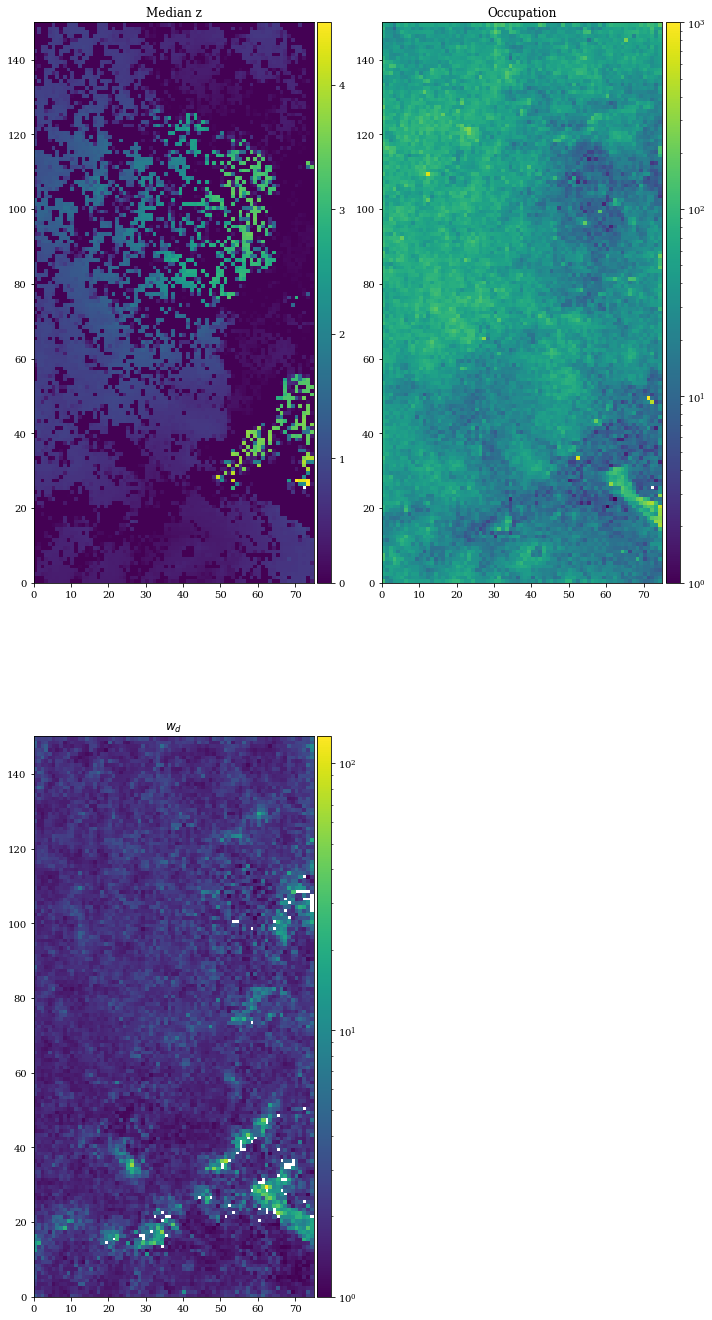

In [6]:
plot_recreate_som(c3r2_table, win_map, som_shape = som_shape,
              plot_dist_map = False, plot_med_z_map = True, plot_occ_map = True, plot_w_d_map = True)

# Plot median I-band magnitude
C3R2 photometry

Figure 3 in Masters et al 2017?

generating median i-mag map...


/Users/diana/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/diana/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


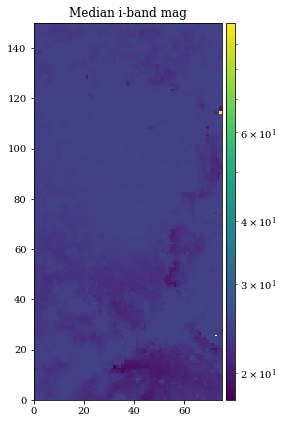

In [7]:
plot_single(c3r2_table, win_map, som_shape = som_shape, plot_i_mag_map = True, save = True)

# Plot fractional occupation for zCOSMOS 2015

In [25]:
# cosmos2015 only
cosmos_2015_table = c3r2_table[np.where(c3r2_table['has_z_COSMOS2015'] == True)]

In [26]:
# generate a dictionary that contains the indices of each galaxy with a zCOSMOS2015 occupying each cell
cosmos_2015_map = defaultdict(list)
return_indices = True
for i, x in enumerate(cosmos_2015_table): 
    cosmos_2015_map[(int(cosmos_2015_table[i]['CELLX']), int(cosmos_2015_table[i]['CELLY']))].append(i) 

In [32]:
#cosmos_2015_map
#win_map

In [43]:
# create empty fractional occupation map
frac_occ_map = np.zeros(som_shape) 

for iy, ix in np.ndindex(som_shape):  
    if len(win_map[(iy,ix)]) == 0: 
           frac_occ_map[iy,ix] = 0
    else: 
        frac_occ_map[iy, ix] = len(cosmos_2015_map[(iy,ix)]) / len(win_map[(iy,ix)])

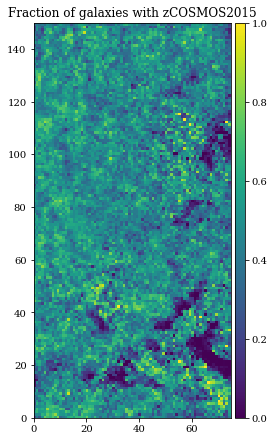

In [44]:
# plot 
# for consistency... (add to "pipeline") 
n_plots = 1
#sum([plot_med_z_map, plot_occ_map, plot_w_d_map])
    
n_cols = 2 # arbitrary
    
n_rows = n_plots // n_cols
n_rows += n_plots % n_cols
    
pos_plots = range(1, n_plots + 1) 

plots = [frac_occ_map]
labels = ['Fraction of galaxies with zCOSMOS2015']
ii = 0
# main figure
fig = plt.figure(figsize = (7,10))

ax = fig.add_subplot(n_rows, n_cols, pos_plots[ii]) 
        
divider = make_axes_locatable(ax)
        
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.pcolor(plots[ii].T, cmap = 'viridis')

fig.colorbar(im, cax = cax, orientation = 'vertical') 
        
ax.axis('equal')
        
ax.title.set_text(labels[ii])
        
plt.tight_layout()
    

# Plot fractional occupation for spectroscopic zs

In [19]:
# z spec (actually spectroscopic redshifts, not the column that's labeled z_spec, which includes COSMOS2015)
"""
condition = (c3r2_table[win_map[(0,0)]]['has_z_zcosbrightspec'] == True or 
             c3r2_table[win_map[(0,0)]]['has_z_zcosbrightspec20k_dr3'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_vvds_spF10_WIDE'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_mosdef'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_fmos_cosmos'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_LEGA_C_DR2'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_deimos'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_c3r2_dr2'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_c3r2_dr3'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_MMTBinospec'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_SDSS_DR16'] == True)
"""

# work on this!!! 
z_spec_table = c3r2_table[np.where((c3r2_table[win_map[(0,0)]]['has_z_zcosbrightspec'] == True or 
             c3r2_table[win_map[(0,0)]]['has_z_zcosbrightspec20k_dr3'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_vvds_spF10_WIDE'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_mosdef'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_fmos_cosmos'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_LEGA_C_DR2'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_deimos'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_c3r2_dr2'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_c3r2_dr3'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_MMTBinospec'] == True or
             c3r2_table[win_map[(0,0)]]['has_z_SDSS_DR16'] == True))]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()